<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/09_knn/2_knn_theorie_invulversie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

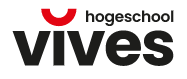<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# K NEAREST NEIGHBORS: THEORIE

## 1. Uitleg

K Nearest Neighbors (KNN) bestaat voor:
- unsupervised learning
- supervised learning
  - regressie
  - classificatie

In deze notebook: classificatie


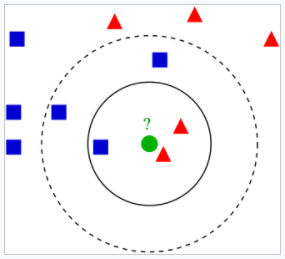

Figuur:
- 2 klassen:
  - blauwe vierkantjes (links)
  - rode driehoekjes (rechts)
- = gelabelde trainingsdata!
- in het midden: nieuw data punt
- tot welke klasse behoort dit punt?

Oplossing 1:
- 3 dichtste punten nemen:
 - 1 blauw vierkantje en 2 rode driehoekjes
 - => nieuwe datapunt is een rood driehoekje
- 5 dichtste punten nemen:
 - 3 blauwe vierkantjes en 2 rode driehoekjes
 - => nieuwe datapunt is een blauw vierkantje
- K = aantal dichtste punten (= hyperparameter)
- Hoe K dichtste punten bepalen? Afstand berekenen:
  - Euclidische afstand
  - Manhattan afstand
  - ...

Oplossing 2:
- Cirkel tekenen:
  - middelpunt = nieuwe datapunt
  - gegeven straal R (= hyperparameter)
- datapunten binnen cirkel checken:
  - cirkel in volle lijn:
    - 1 blauw vierkantje, 2 rode driehoekjes
    - => nieuw punt is rood driehoekje
  - cirkel in stippellijn:
    - 3 blauw vierkantjes, 2 rode driehoekjes
    - => nieuw punt is blauw vierkantje

Conclusie:
- nieuw label hangt af van K of R
- hangt ook af van de afstandsmaat (Euclidisch bv.)

In deze notebook:
- K dichtste punten bekijken
- adhv Euclidische afstand

## 2. Dataset

Pandas en Numpy importeren:

In [ ]:
# vul hier je code aan


Data-file "aliens2.csv" inlezen (zie topic over logistic regression):

In [ ]:
# vul hier je code aan


Matrix `X` met de 2 features creëren, nl. aantal keren "Crack" en aantal keren "Dunk":

In [ ]:
# vul hier je code aan


Vector `y` met de labels, nl. 1 indien "happy", 0 indien "sad":

In [ ]:
# vul hier je code aan


## 3. Implementatie

### Euclidische afstand

Wiskundig:
- $n$ features $x_1$, $x_2$, ..., $x_n$
- afstand $d_{i,j}$ tussen 2 datapunten $i$ en $j$
  - **Euclidische afstand** in $n$ dimensies:
  - $d_{i,j} = \sqrt{\sum_{k=1}^{n}{(x_{i,k} - x_{j,k})^2}}$

Code:
- `n` features `x1`, `x2`, ...,  `xn` = `n` vectoren = `n` kolommen in matrix `X`
- afstand `d` tussen 2 datapunten (= rijen) `i` en `j`:
  - `d = sqrt(sum((X[i, :] - X[j, :])**2))`
- Alle datapunten: matrix `D` met `D[i, j] = d`

Meer uitleg: zie Topic over Clustering

Hier moeten we afstand tussen (nieuw) datapunt `x` en de trainingsdataset `X` berekenen:

`d = sqrt(sum((X - x)**2))`

Voorbeeld: nieuw datapunt `x = [0, 0]`

In [ ]:
x = np.array([0, 0])

# bereken X - x
# Laat numpy broadcasting toepassen: x wordt automatisch afgetrokken van elke rij van matrix X!


In [ ]:
# bereken (X - x)**2 en maak gebruik van np.square()


In [ ]:
# neem nu de som van alle (X - x)**2
# axis=1 niet vergeten, want we werken per rij!


In [ ]:
# geef nu de volledige gevectoriseerde expressie
# dus ook nog eens de vierkantswortel nemen van alle sommen
# dat geeft de gevraagde afstanden


We maken er een functie van:

In [ ]:
# creëer een functie "distance" met input X en x en output de vector met afstanden
# maak gebruik van lambda


Testen:

In [ ]:
d = distance(X, np.array([0, 0]))
d

### K dichtste punten

Afstanden sorteren van klein naar groot

MAAR we hebben de indices nodig!

In [ ]:
# creëer variabele indices met de integers van 0 tot en met m-1
# met m het aantal datapunten
# leid m af uit de shape van X
# maak gebruik van np.arange()


Indices sorteren met functie `sorted` en de berekende afstanden als `key`:

In [ ]:
sorted_indices = sorted(indices, key=lambda i: d[i])  # key moet functie zijn...
sorted_indices

[0, 2, 1, 3, 5, 4, 6, 7]

K eerste indices nemen:

In [ ]:
k = 3
# geef hier de k eerste indices uit sorted_indices


Labels van de K dichtste punten:

In [ ]:
# stop de labels van de k dichtste punten in variabele k_labels


### Label bepalen

nieuw label:
- bij regressie: gewogen gemiddelde van de labels van de K dichtste punten
- bij classificatie: modus van de labels van de K dichtste punten

**Modus** (Engels: mode) = meest voorkomende element.

Functie `mode()` uit `scipy.stats` module gebruiken:


In [ ]:
from scipy.stats import mode  # functie mode() uit scipy.stats module

reeks = [1, 2, 3, 2, 1, 2, 3, 2, 1]  # 2 komt het meest voor

mode(reeks)

ModeResult(mode=array([2]), count=array([4]))

Resultaat:
- eerste element is de modus
- tweede element is het aantal keren dat de modus voorkomt

In [ ]:
mode(reeks)[0]  # geeft de modus als numpy array

array([2])

Toepassen op ons voorbeeld:

In [ ]:
# pas mode() toe op array k_labels
# stop het voorspelde label in variabele yp


### Functie `k_nearest`

Code uit de vorige stappen samenvoegen in een functie `k_nearest()`:

In [ ]:
import numpy as np
from scipy.stats import mode

def k_nearest(Xnew, X, y, k=1, distance=None):
    # Xnew is an numpy array with p rows (= examples) and n columns (= features)
    # X and y is the training dataset:
    #   X is an numpy array with m rows (= examples) and n columns (= features)
    #   y is an numpy array with m elements (= labels)
    # k is the number of nearest points (default is 1)
    # distance is a function to calculate distances between points
    #   distance(X, x) is called where x is a new data point with n elements
    #   distance(X, x) returns vector d with m distances
    #   by default Euclidean distance is calculated
    # return value: numpy array yp with p predicted labels for dataset Xnew

    # vervang pass door jou code
    pass


Testen met de trainingsdataset:

In [ ]:
k_nearest(X, X, y)

De voorspelde labels komen overeen met de echte labels.

Testen met punten `x1  = [0, 0]` en `x2 = [3, 3]`

In [ ]:
Xnew = np.array([[0, 0], [3, 3]])
k_nearest(Xnew, X, y, k=3)

De voorspelde labels kloppen:
- Het eerste punt moet "sad" zijn (Alien zegt niks)
- Het tweede punt moet "happy" zijn (Alien zegt veel)

## 4. Scikit-Learn

Scikit-Learn voorziet verschillende K Nearest Neighbors algoritmes voor supervised en unsupervised learning:

https://scikit-learn.org/stable/modules/neighbors.html

Wij bekijken de KNN classifier:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

`KNeighborsClassifier` is een klasse met dezelfde interface als `Perceptron`, `LogisticRegression`, ...

Toepassen op ons voorbeeld:

In [ ]:
knn = KNN(n_neighbors=3)  # n_neighbors = K

In [ ]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

- parameter `n_neighbors`: aantal dichtstbijzijnde punten K
- parameter `metric`:
  - bepaalt hoe de afstand wordt berekend
  - indien gelijk aan `"minkowski"` met parameter `p=2`: Euclidische afstand
  - zie documentatie
- parameter `algorithm`:
  - verschillende algoritmes mogelijk
  - zie documentatie

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
  

Testen op de traingsdataset `X`:

In [ ]:
# roep methode predict() aan met X als input


Testen op de nieuwe punten `Xnew`:

In [ ]:
# roep methode predict() aan met Xnew als input


## 5. Meer info

Omdat K Nearest Neighbors een eenvoudig algoritme is, vind je op het internet veel blogs die dit algoritme uitleggen, bijvoorbeeld:

- https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
- https://towardsdatascience.com/k-nearest-neighbours-introduction-to-machine-learning-algorithms-18e7ce3d802a

Nuttig om blogs van anderen door te nemen, maar wees kritisch!



---



---
## Bronnen:
*  https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
*  https://scikit-learn.org/stable/modules/neighbors.html